In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost as xgb

In [123]:
df = pd.read_csv('clean_data.csv')
df.head(20)

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
5,25.29,4.71,Male,No,Sun,Dinner,4,18.623962
6,8.77,2.00,Male,No,Sun,Dinner,2,22.805017
7,26.88,3.12,Male,No,Sun,Dinner,4,11.607143
8,15.04,1.96,Male,No,Sun,Dinner,2,13.031915
9,14.78,3.23,Male,No,Sun,Dinner,2,21.853857


In [124]:
df.isnull().sum()

total_bill        0
tip               0
sex               0
smoker            0
day               0
time              0
size              0
tip_percentage    0
dtype: int64

In [125]:
df['tip'].max()

np.float64(10.0)

In [126]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [127]:
df.drop(columns='tip_percentage',inplace=True)


In [128]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [129]:
df['total_bill']  = df['total_bill']*100
df['tip'] = df['tip']*100
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,1699.0,101.0,Female,No,Sun,Dinner,2
1,1034.0,166.0,Male,No,Sun,Dinner,3
2,2101.0,350.0,Male,No,Sun,Dinner,3
3,2368.0,331.0,Male,No,Sun,Dinner,2
4,2459.0,361.0,Female,No,Sun,Dinner,4


In [130]:
df['tip'].max()

np.float64(1000.0)

maximum total bill = 50 81,
maximum size = 6,
maximum tip = 1000

In [131]:
x= df.drop('tip', axis=1)
y = df['tip']

In [132]:
from sklearn.preprocessing import LabelEncoder  # Difference b/w OneHotEncoder and LabelEncoder ?

le = LabelEncoder() 
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['time'] = le.fit_transform(df['time'])
df['day'] = le.fit_transform(df['day'])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,1699.0,101.0,0,0,2,0,2
1,1034.0,166.0,1,0,2,0,3
2,2101.0,350.0,1,0,2,0,3
3,2368.0,331.0,1,0,2,0,2
4,2459.0,361.0,0,0,2,0,4


In [133]:
df.shape

(244, 7)

In [134]:
df.dropna(inplace=True)

C:\Users\Shishupal Kumar\AppData\Local\Temp\ipykernel_37712\2877701566.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill'] , color='blue')


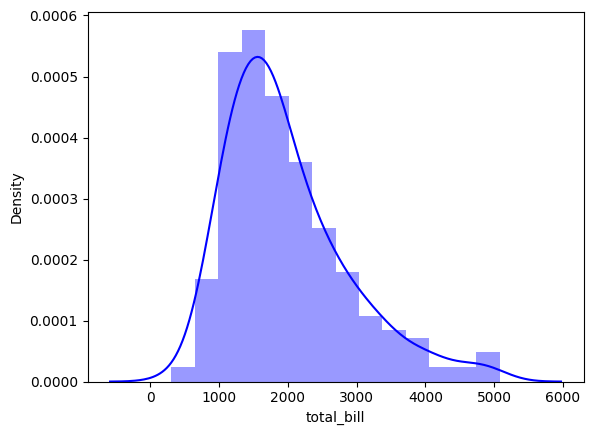

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['total_bill'] , color='blue')


plt.show()



C:\Users\Shishupal Kumar\AppData\Local\Temp\ipykernel_37712\2731473159.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tip'], color='green')


<Axes: xlabel='tip', ylabel='Density'>

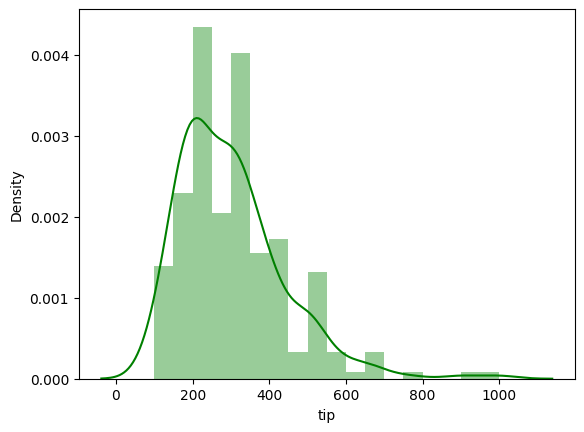

In [136]:
sns.distplot(df['tip'], color='green')


C:\Users\Shishupal Kumar\AppData\Local\Temp\ipykernel_37712\393166219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['size'], color='red')


<Axes: xlabel='size', ylabel='Density'>

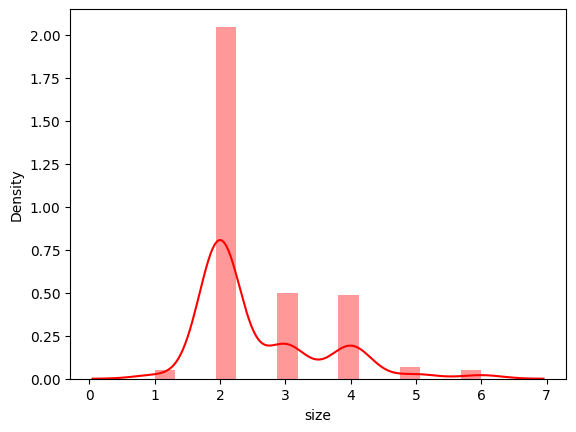

In [137]:
sns.distplot(df['size'], color='red')


C:\Users\Shishupal Kumar\AppData\Local\Temp\ipykernel_37712\3152736585.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['day'] , color='purple')


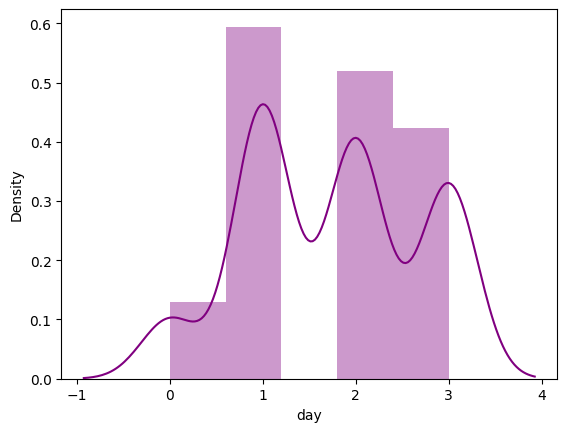

In [138]:
sns.distplot(df['day'] , color='purple')
plt.show()

In [139]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [140]:
df.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,1699.0,101.0,0,0,2,0,2
1,1034.0,166.0,1,0,2,0,3
2,2101.0,350.0,1,0,2,0,3
3,2368.0,331.0,1,0,2,0,2
4,2459.0,361.0,0,0,2,0,4
5,2529.0,471.0,1,0,2,0,4
6,877.0,200.0,1,0,2,0,2
7,2688.0,312.0,1,0,2,0,4
8,1504.0,196.0,1,0,2,0,2
9,1478.0,323.0,1,0,2,0,2


In [141]:
# Remove Outliers for total_bill column
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

outliers = df[(df['total_bill'] < lower_bound) | (df['total_bill']>upper_bound)]
outliers

#Capping
new_df_cap_totalBill = df.copy()
new_df_cap_totalBill['total_bill'] = np.where(new_df_cap_totalBill['total_bill']<lower_bound,
                                              lower_bound,
                                              np.where(new_df_cap_totalBill['total_bill']>upper_bound,
                                                       upper_bound,
                                                       new_df_cap_totalBill['total_bill']))



In [142]:
# Outlier of tip
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1-1.5*IQR
upper_bound  = Q3+1.5*IQR

outliers = df[(df['tip'] < lower_bound) | (df['tip']>upper_bound)]
outliers

# Capping 
new_df_cap_tip = df.copy()
new_df_cap_tip['tip']= np.where(new_df_cap_tip['tip']<lower_bound,
                                lower_bound,
                                np.where(new_df_cap_tip['tip']> upper_bound,
                                         upper_bound,
                                         new_df_cap_tip['tip']))
new_df_cap_tip.shape

(244, 7)

In [143]:
# # Outliers of tip_percentage columns
# Q1 = df['tip_percentage'].quantile(0.25)
# Q3 = df['tip_percentage'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1-1.5*IQR
# upper_bound = Q3+1.5*IQR

# outliers = df[(df['tip_percentage']<lower_bound) | (df['tip']>upper_bound)]
# outliers

In [144]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size = 0.2, random_state=42)

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
# scaling the data
standardscaler = StandardScaler()
normalization =MinMaxScaler()



In [147]:
x_train_standardscaler=standardscaler.fit_transform(x_train)
x_test_standardscaler = standardscaler.fit_transform(x_test)


In [148]:
x_train_normalized = normalization.fit_transform(x_train)
x_test_normalized = normalization.fit_transform(x_test)

In [149]:
# linear Regression model by standard scaler 
lin_reg = LinearRegression()
lin_reg.fit(x_train_standardscaler, y_train)

y_pred = lin_reg.predict(x_test)
y_pred


c:\Users\Shishupal Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 903.67436238,  411.54145402, 1085.74465718, 1196.63853995,
        592.18498039,  801.07020665, 1261.40115039,  578.9556013 ,
        689.28390164,  710.69480125,  835.32912392,  487.86625524,
        483.38361793,  655.37737251,  464.22755148,  822.37157117,
        870.22864992,  991.57545348,  747.59440414, 1847.85934955,
        928.40824968,  942.03374121,  682.11510772,  435.40066547,
        955.24416773,  541.61833095,  470.68643964, 1167.85427601,
        741.37977648, 2146.04532064, 1697.47705139,  357.77285537,
        803.47977522,  924.14170442,  787.45905416, 1081.38520405,
        541.99428193, 1929.77200561,  611.92884677, 1005.20432481,
        473.0080221 ,  657.25205042, 1069.4837759 ,  472.57332516,
        478.53088792,  150.75206499,  482.44221704,  840.5666048 ,
        350.33505945])

In [150]:
print("train score " , lin_reg.score(x_train_standardscaler , y_train))
print("test score " , lin_reg.score(x_test_standardscaler , y_test))

train score  0.3751955346472442
test score  0.5148614040313724


In [151]:
# Model Evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,accuracy_score
r2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print("R2 score:", r2_score)
print("MAE: ", mae)
print("MSE:", mse)
print("RMSE:",rmse)

R2 score: -848994.8611636433
MAE:  817.1091467660352
MSE: 833791.020668001
RMSE: 913.12158044151


In [152]:
# # ROC-AUC Curve
# from sklearn.metrics import roc_curve , roc_auc_score
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# #compute AUC Score
# auc_score  = roc_auc_score(y_test, y_pred)
# print("AUC Score:", auc_score)

# # Plot ROC curve
# plt.plot(fpr,tpr,label='ROC Curve (AUC= {:.3f})'.format(auc_score))
# plt.plot([0,1],[0,1] , 'k--', label='Random Guess Line')  # Diagonal line
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC - AUC Curve")
# plt.legend()
# plt.show()

In [153]:
# Random Forests
rf = RandomForestRegressor(n_estimators=200 , max_depth=None , random_state=42)

# rf = RandomForestRegressor(
#     n_estimators=200,
#     max_depth=10,
#     min_samples_split=5,
#     min_samples_leaf=4,
#     max_features='sqrt'
# )

rf.fit(x_train_standardscaler , y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [154]:
print("train score (standard scaler):",rf.score(x_train_standardscaler , y_train))
print("test score (standard scaler):", rf.score(x_test_standardscaler , y_test))

train score (standard scaler): 0.8922522478790775
test score (standard scaler): 0.437619020356234


In [155]:
y_pred = rf.predict(x_test_standardscaler)


In [156]:
print("train score (standard scaler): ",rf.score(x_train_standardscaler , y_train))
print("test score (standard scaler): ", rf.score(x_test_standardscaler, y_test))

train score (standard scaler):  0.8922522478790775
test score (standard scaler):  0.437619020356234


In [157]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test,y_pred)

print("MAE (standard scaler):", mae)
print("MSE (standard scaler):", mse)
print("RMSE (standard scaler):", rmse)
print("R2 Score (standard scaler):", r2)


MAE (standard scaler): 0.5510204081632653
MSE (standard scaler): 0.5523091836734694
RMSE (standard scaler): 0.5523091836734694
R2 Score (standard scaler): 0.437619020356234


In [158]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

train_score = r2_score(y_train , y_train_pred)
test_score = r2_score(y_test, y_test_pred)

print("Train R2: ", train_score)
print("Test R2: ", test_score)

Train R2:  -2.9701194101744517
Test R2:  -2.7513307994062774


c:\Users\Shishupal Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Shishupal Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [159]:
rf_normalized = RandomForestRegressor(n_estimators=200 , max_depth=None, random_state=42)
rf_normalized.fit(x_train_normalized , y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [160]:
print("train score (normalized): " , rf_normalized.score(x_train_normalized , y_train))
print("test score (normalized):" , rf_normalized.score(x_test_normalized , y_test)) 

train score (normalized): 

 0.8921337077309117
test score (normalized): 0.3196725084817642


In [161]:
y_pred_normalized = rf_normalized.predict(x_test_normalized)
print("r2 score (normalized):" ,r2_score(y_test , y_pred_normalized))

r2 score (normalized): 0.3196725084817642


In [172]:
x_train_standardscaler

array([[-0.79306155, -0.2580329 ,  0.73173292, -0.79056942, -0.76167571,
        -0.61093325],
       [ 0.46322744, -0.74211442,  0.73173292,  1.26491106, -0.76167571,
        -0.61093325],
       [ 0.80730659,  0.6399734 ,  0.73173292,  1.26491106, -1.8379566 ,
        -0.61093325],
       ...,
       [-1.65383098, -1.46472887, -1.36661884,  1.26491106, -1.8379566 ,
        -0.61093325],
       [ 1.64749986,  0.32426806,  0.73173292,  1.26491106,  0.31460518,
        -0.61093325],
       [ 2.75289699, -0.41237773, -1.36661884,  1.26491106, -0.76167571,
        -0.61093325]])

In [173]:
df['total_bill'].min()

np.float64(307.0)

In [163]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,1699.0,101.0,0,0,2,0,2
1,1034.0,166.0,1,0,2,0,3
2,2101.0,350.0,1,0,2,0,3
3,2368.0,331.0,1,0,2,0,2
4,2459.0,361.0,0,0,2,0,4


In [164]:
import pickle as pkl
pkl.dump(rf, open('model.pkl', 'wb'))

In [165]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt
# import numpy as np

# train_sizes, train_score, test_score = learning_curve(
#     rf, x, y, cv=5, scoring='r2'
# )

# train_mean = np.mean(train_score, axis=1)
# test_mean  = np.mean(test_score, axis=1)

# plt.plot(train_sizes, train_mean, label="Train Score")
# plt.plot(train_sizes, test_mean, label="Test Score")
# plt.xlabel("Training Data Size")
# plt.ylabel("R2 Score")
# plt.legend()
# plt.show()




# XG Boost

In [166]:
from xgboost import XGBRegressor
xgb_model_standardscaler = XGBRegressor(n_estimators=100,
                         learning_rate=0.1,
                         max_depth=5,
                         subsample=0.8,
                         random_state=42,
                         colsample_bytree=0.8,
                         objective='reg:squarederror'
                         )

xgb_model_standardscaler.fit(x_train_standardscaler,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [167]:
y_pred_standardscaler= xgb_model_standardscaler.predict(x_test_standardscaler)


In [168]:
print("train score (standard scaler):", xgb_model_standardscaler.score(x_train_standardscaler , y_train))
print("test score (standard scaler):" , xgb_model_standardscaler.score(x_test_standardscaler , y_test))

train score (standard scaler): 0.9660845994949341
test score (standard scaler): 0.30584222078323364


In [169]:
# Evaluation the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print("MAE (standard scaler):", mae)
print("MSE (standard scaler):", mse)
print("RMSE (standard scaler):",rmse)
print("R2 Score (standard scaler):",r2)


MAE (standard scaler): 0.5510204081632653
MSE (standard scaler): 0.5523091836734694
RMSE (standard scaler): 0.7431750693298783
R2 Score (standard scaler): 0.437619020356234


In [170]:
xgb_model_normalized = XGBRegressor(n_estimators=100,
                         learning_rate=0.1,
                         max_depth=5,
                         subsample=0.8,
                         random_state=42,
                         colsample_bytree=0.8,
                         objective='reg:squarederror'
                         )

xgb_model_normalized.fit(x_train_normalized,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [171]:
print("train score (normalized):" , xgb_model_normalized.score(x_train_normalized , y_train))
print("test score (normalized):", xgb_model_normalized.score(x_test_normalized , y_test))

train score (normalized): 0.9660845994949341
test score (normalized): 0.2384844422340393
